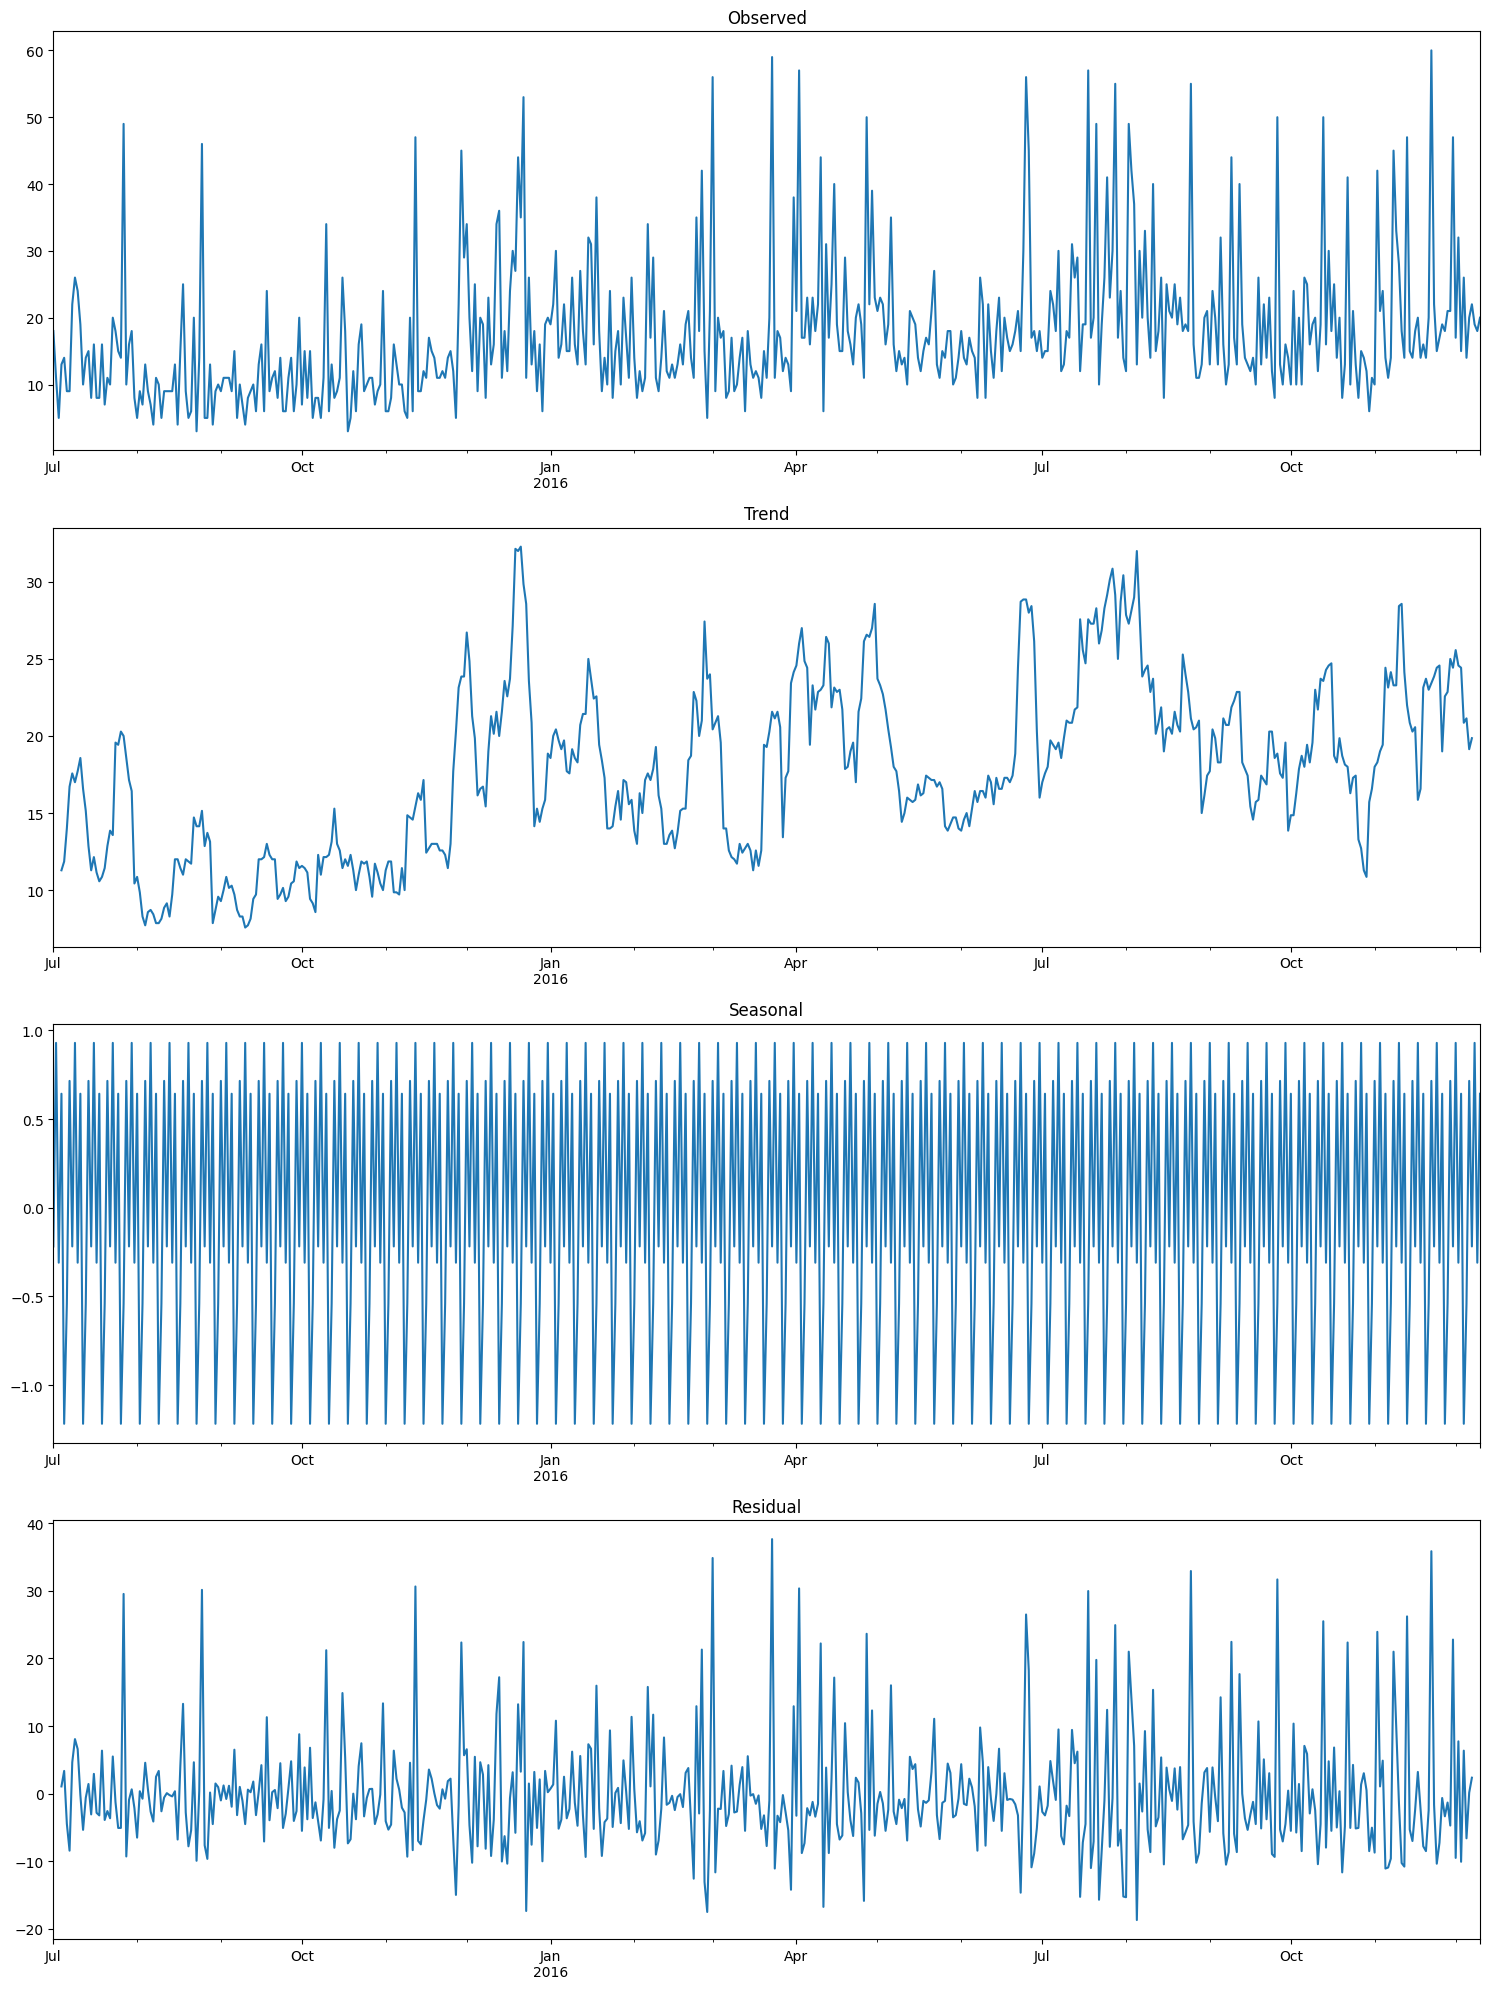

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example data
dates = pd.date_range(start='2015-07-01', periods=529, freq='D')
data = pd.Series(stationary_time_series, index=dates)

data.index.freq = 'D'

decomposition = seasonal_decompose(data, model='additive')

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━

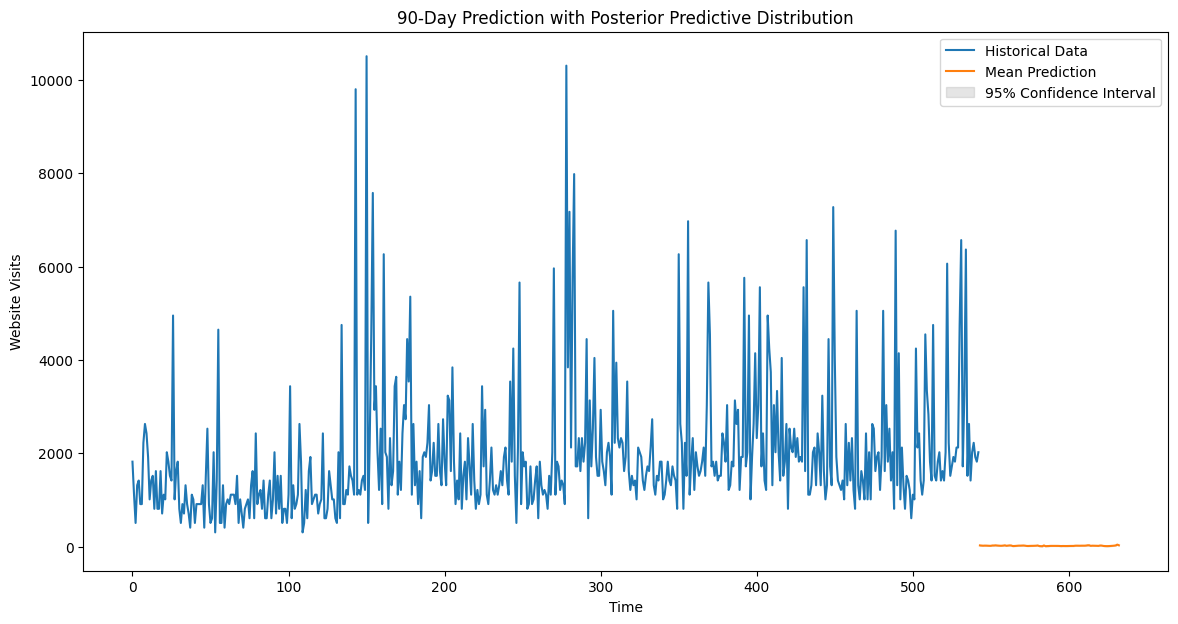

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming stationary_time_series is your time series list
stationary_time_series = np.array(stationary_time_series).reshape(-1, 1)

# Parameters
seq_length = 50  # Sequence length used for training
n_predictions = 90  # Number of days to predict
n_simulations = 100  # Number of simulations to capture uncertainty

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
stationary_time_series_scaled = scaler.fit_transform(stationary_time_series)

# Get the last sequence to start predicting
last_sequence = stationary_time_series_scaled[-seq_length:]

# Function to predict the next `n_days` with uncertainty
def predict_with_uncertainty(model, last_sequence, n_days, n_simulations):
    predictions = []
    for _ in range(n_simulations):
        temp_sequence = last_sequence.copy().reshape(1, seq_length, 1)
        simulation_predictions = []
        for _ in range(n_days):
            pred = model.predict(temp_sequence)
            simulation_predictions.append(pred[0][0])
            temp_sequence = np.append(temp_sequence[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
        predictions.append(simulation_predictions)
    return np.array(predictions)

# Generate predictions
predictions = predict_with_uncertainty(model, last_sequence, n_predictions, n_simulations)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.T).T

# Calculate mean and confidence intervals
mean_predictions = np.mean(predictions, axis=0)
lower_bound = np.percentile(predictions, 2.5, axis=0)
upper_bound = np.percentile(predictions, 97.5, axis=0)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(range(len(stationary_time_series)), scaler.inverse_transform(stationary_time_series), label='Historical Data')
plt.plot(range(len(stationary_time_series), len(stationary_time_series) + n_predictions), mean_predictions, label='Mean Prediction')
plt.fill_between(range(len(stationary_time_series), len(stationary_time_series) + n_predictions), lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Website Visits')
plt.title('90-Day Prediction with Posterior Predictive Distribution')
plt.legend()
plt.show()
